# Objective

This notebook uses the dataset that filters extremely high reports, Winsorizes the outputs, and uses the Scope 1 and 2 data as a feature.  

In [23]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

dtype_dict = {
    **{col: str for col in [
        "Year of Data", "Primary activity", "Primary sector", "Primary industry",
        "Account Numbers", "Countries", "Scope 3 Sources", "Evaluation Status",
        "Calculation_Method_modeled", 
        "Third_Party_Verification"
    ]},
    **{col: float for col in [
        "Scope_3_windsorized", "Scope 1 2 total emission",
        "log_Scope 1 2 total emission", "log_Revenue_USD",
        "log_Market_Cap_USD", "log_ebitda_USD",
        "log_grossProfit_USD", "log_netIncome_USD",
        "log_cashAndCashEquivalents_USD", "log_longTermInvestments_USD",
        "log_totalAssets_USD", "log_totalLiabilities_USD",
        "log_totalInvestments_USD", "log_totalDebt_USD",
        "log_totalEquity_USD", "log_Scope 3 Amount",
        "Perc emissions calculated w primary data ",
    ]}
}


prepped_df = pd.read_csv(r"C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\Corporate_Data\Scope_3_non_nulls_non_zero_winds_logged.csv", dtype=dtype_dict)

prepped_df['Calculation_Method_modeled'] = prepped_df['Calculation_Method_modeled'].fillna('Calculation Undetermined')

prepped_df = prepped_df.rename(columns={'Scope 1 2 total emission': 'Scope_1_2_total_emission'})



In [25]:
prepped_df.head()

,Year of Data,Primary activity,Primary sector,Primary industry,Account Numbers,Countries,Company Name,Primary Stock Ticker,Row_num,Scope 3 Sources,Evaluation Status,Scope 3 Amount,Perc emissions calculated w primary data,Scope_1_2_total_emission,Third_Party_Verification,Revenue_USD,Market_Cap_USD,ebitda_USD,grossProfit_USD,netIncome_USD,cashAndCashEquivalents_USD,longTermInvestments_USD,totalAssets_USD,totalLiabilities_USD,totalInvestments_USD,totalDebt_USD,totalEquity_USD,Calculation_Method_modeled,log_ebitda_USD,log_grossProfit_USD,log_netIncome_USD,log_totalEquity_USD,log_Scope 1 2 total emission,log_Revenue_USD,log_Market_Cap_USD,log_cashAndCashEquivalents_USD,log_longTermInvestments_USD,log_totalAssets_USD,log_totalLiabilities_USD,log_totalInvestments_USD,log_totalDebt_USD,Scope_3_windsorized,log_Scope 3 Amount
0,2013,Asset managers,Financial services,Services,44,United Kingdom,3i Group,III LN,5,Waste generated in operations,"Relevant, calculated",12.34,0.0,4.063500e+02,Third party verification or assurance complete,9.385300e+08,4.640933e+09,7.899400e+08,9.385300e+08,6.565900e+08,8.166100e+08,4.460240e+09,5.572760e+09,1.371600e+09,4.460240e+09,1.078230e+09,4.201160e+09,Calculation Undetermined,20.487468,20.659825,20.302570,22.158627,6.009673,20.659825,22.258181,20.520672,22.218468,22.441156,21.039244,22.218468,20.798587,12.34,2.590767
1,2013,Asset managers,Financial services,Services,44,United Kingdom,3i Group,III LN,6,Business travel,"Relevant, calculated",56.78,0.0,4.063500e+02,Third party verification or assurance complete,9.385300e+08,4.640933e+09,7.899400e+08,9.385300e+08,6.565900e+08,8.166100e+08,4.460240e+09,5.572760e+09,1.371600e+09,4.460240e+09,1.078230e+09,4.201160e+09,Calculation Undetermined,20.487468,20.659825,20.302570,22.158627,6.009673,20.659825,22.258181,20.520672,22.218468,22.441156,21.039244,22.218468,20.798587,56.78,4.056643
2,2013,Commercial services,Commercial & consumer services,Services,58,USA,ABM INDUSTRIES INC,ABM US,6,Business travel,"Relevant, calculated",1706.23,0.0,5.818828e+04,No third party verification or assurance,4.809281e+09,1.592463e+09,1.538970e+08,4.958520e+08,7.290000e+07,3.263900e+07,3.595100e+07,2.119236e+09,1.201729e+09,3.595100e+07,3.148700e+08,9.175070e+08,Calculation Undetermined,18.851794,20.021788,18.104599,20.637171,10.971456,22.293813,21.188548,17.301018,17.397667,21.474321,20.907027,17.397667,19.567670,1706.23,7.442627
3,2013,Medical equipment,Medical equipment & supplies,"Biotech, health care & pharma",64,USA,Abbott Laboratories,ABT US,1,Purchased goods and services,"Relevant, calculated",5802000.00,0.0,1.055384e+06,No third party verification or assurance,2.184800e+10,5.756930e+10,3.452000e+09,1.180800e+10,2.576000e+09,3.475000e+09,1.190000e+08,4.295300e+10,1.768600e+10,4.742000e+09,6.561000e+09,2.526700e+10,Calculation Undetermined,21.962220,23.192043,21.669504,23.952765,13.869417,23.807375,24.776255,21.968860,18.594634,24.483372,23.596039,22.279725,22.604409,5802000.00,15.573713
4,2013,Medical equipment,Medical equipment & supplies,"Biotech, health care & pharma",64,USA,Abbott Laboratories,ABT US,2,Capital goods,"Relevant, calculated",504000.00,0.0,1.055384e+06,No third party verification or assurance,2.184800e+10,5.756930e+10,3.452000e+09,1.180800e+10,2.576000e+09,3.475000e+09,1.190000e+08,4.295300e+10,1.768600e+10,4.742000e+09,6.561000e+09,2.526700e+10,Calculation Undetermined,21.962220,23.192043,21.669504,23.952765,13.869417,23.807375,24.776255,21.968860,18.594634,24.483372,23.596039,22.279725,22.604409,504000.00,13.130334


In [15]:
Scope_3_df  = prepped_df.copy()

# Visualizations for presentation

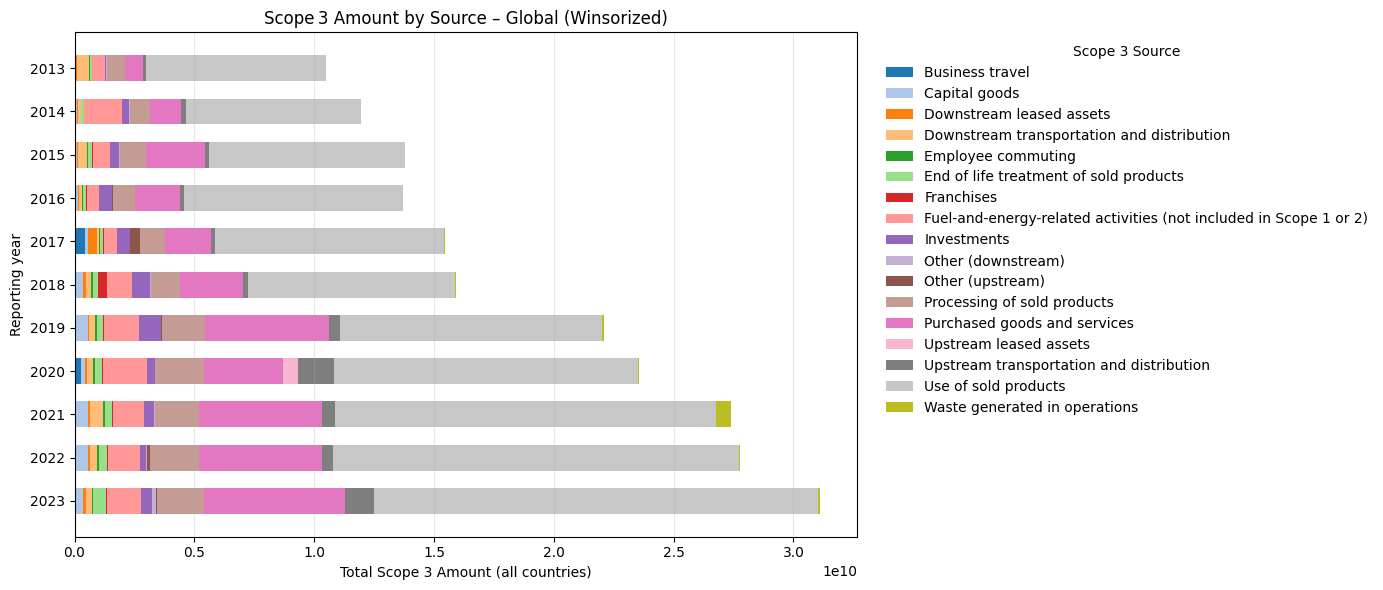

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------- CONFIG --------------------
DF_NAME   = "Scope_3_df"           # make sure this dataframe is loaded
YEAR_COL  = "Year of Data"
SOURCE_COL = "Scope 3 Sources"
VALUE_COL  = "Scope 3 Amount"

# -------------------- SAFETY --------------------
if DF_NAME not in globals():
    raise NameError(f"{DF_NAME} is not defined. Load it, then rerun.")
df = globals()[DF_NAME]

# -------------------- PREP THE DATA --------------------
df_agg = (
    df.groupby([YEAR_COL, SOURCE_COL])[VALUE_COL]
      .sum()
      .reset_index()
)

# pivot → one column per source, rows = years
pivot = df_agg.pivot(index=YEAR_COL, columns=SOURCE_COL, values=VALUE_COL).fillna(0)

# sort years chronologically (index may be strings)
pivot.index = pivot.index.astype(int)
pivot = pivot.sort_index()

# colours: use matplotlib default qualitative palette
source_names = pivot.columns.tolist()
colors = plt.cm.tab20.colors   # 20 distinct colours
color_cycle = [colors[i % len(colors)] for i in range(len(source_names))]
color_map   = dict(zip(source_names, color_cycle))

# -------------------- PLOT --------------------
fig, ax = plt.subplots(figsize=(14, 6))

bottom = np.zeros(len(pivot))
bar_height = 0.6

for src in source_names:
    values = pivot[src].values
    ax.barh(
        pivot.index.astype(str),  # y positions
        values,
        left=bottom,
        height=bar_height,
        color=color_map[src],
        label=src,
    )
    bottom += values   # stack

ax.set_xlabel("Total Scope 3 Amount (all countries)")
ax.set_ylabel("Reporting year")
ax.set_title("Scope 3 Amount by Source – Global (Winsorized)")
ax.invert_yaxis()  # most recent year on top
ax.grid(axis="x", alpha=0.3)

# Build a legend outside
ax.legend(
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    frameon=False,
    title="Scope 3 Source"
)

plt.tight_layout()
plt.show()


# Account Numbers across groups

In [17]:
import pandas as pd

# Group by 'Account_Numbers' and get the count of distinct 'Year_of_Data'
account_year_counts = prepped_df.groupby("Account Numbers")["Year of Data"].nunique()

# This Series tells us, for each account, how many different years it appears in
# e.g. account_year_counts.loc["ACCT123"] might be 3 -> it appears in 3 distinct years

# Now count how many accounts appear in exactly 1 year, 2 years, etc.
distribution = account_year_counts.value_counts().sort_index()

# Print summary
for num_years, num_accounts in distribution.items():
    print(f"{num_accounts} 'Account Numbers' appear in {num_years} different 'Year of Data'")

# Optionally convert to DataFrame for clarity
distribution_df = distribution.rename_axis("Distinct Years").reset_index(name="Number of Accounts")
print("\nDistribution of Account_Numbers by Distinct Years of Data:\n", distribution_df)


979 'Account Numbers' appear in 1 different 'Year of Data'
401 'Account Numbers' appear in 2 different 'Year of Data'
284 'Account Numbers' appear in 3 different 'Year of Data'
214 'Account Numbers' appear in 4 different 'Year of Data'
225 'Account Numbers' appear in 5 different 'Year of Data'
184 'Account Numbers' appear in 6 different 'Year of Data'
134 'Account Numbers' appear in 7 different 'Year of Data'
113 'Account Numbers' appear in 8 different 'Year of Data'
123 'Account Numbers' appear in 9 different 'Year of Data'
162 'Account Numbers' appear in 10 different 'Year of Data'
331 'Account Numbers' appear in 11 different 'Year of Data'

Distribution of Account_Numbers by Distinct Years of Data:
     Distinct Years  Number of Accounts
0                1                 979
1                2                 401
2                3                 284
3                4                 214
4                5                 225
5                6                 184
6              

In [18]:
# 1) Group by 'Account_Numbers' to get how many distinct Year_of_Data each has
account_year_counts = prepped_df.groupby("Account Numbers")["Year of Data"].nunique()

# 2) Identify accounts that appear in exactly 1 distinct year
accounts_single_year = account_year_counts[account_year_counts == 11].index

# 3) Drop rows where 'Account Numbers' is in that list
prepped_df = prepped_df[~prepped_df["Account Numbers"].isin(accounts_single_year)]

print(f"Rows remaining: {prepped_df.shape[0]}")


Rows remaining: 60789


In [19]:

# Group by 'Account_Numbers' and get the count of distinct 'Year_of_Data'
account_year_counts = prepped_df.groupby("Account Numbers")["Year of Data"].nunique()

# This Series tells us, for each account, how many different years it appears in
# e.g. account_year_counts.loc["ACCT123"] might be 3 -> it appears in 3 distinct years

# Now count how many accounts appear in exactly 1 year, 2 years, etc.
distribution = account_year_counts.value_counts().sort_index()

# Print summary
for num_years, num_accounts in distribution.items():
    print(f"{num_accounts} 'Account Numbers' appear in {num_years} different 'Year of Data'")

# Optionally convert to DataFrame for clarity
distribution_df = distribution.rename_axis("Distinct Years").reset_index(name="Number of Accounts")
print("\nDistribution of Account_Numbers by Distinct Years of Data:\n", distribution_df)


979 'Account Numbers' appear in 1 different 'Year of Data'
401 'Account Numbers' appear in 2 different 'Year of Data'
284 'Account Numbers' appear in 3 different 'Year of Data'
214 'Account Numbers' appear in 4 different 'Year of Data'
225 'Account Numbers' appear in 5 different 'Year of Data'
184 'Account Numbers' appear in 6 different 'Year of Data'
134 'Account Numbers' appear in 7 different 'Year of Data'
113 'Account Numbers' appear in 8 different 'Year of Data'
123 'Account Numbers' appear in 9 different 'Year of Data'
162 'Account Numbers' appear in 10 different 'Year of Data'

Distribution of Account_Numbers by Distinct Years of Data:
    Distinct Years  Number of Accounts
0               1                 979
1               2                 401
2               3                 284
3               4                 214
4               5                 225
5               6                 184
6               7                 134
7               8                 113
8     

In [20]:
# Count 0 values
zero_count = (prepped_df["log_Scope 3 Amount"] == 0).sum()

# Count values less than 0
negative_count = (prepped_df["log_Scope 3 Amount"] < 0).sum()

print(f"Number of 0 values in 'log_Scope 3 Amount': {zero_count}")
print(f"Number of values less than 0 in 'log_Scope 3 Amount': {negative_count}")


Number of 0 values in 'log_Scope 3 Amount': 0
Number of values less than 0 in 'log_Scope 3 Amount': 0


In [21]:
# Remove zero values BEFORE log transformation
prepped_df = prepped_df[prepped_df["Scope 3 Amount"] > 0].copy()

# Create the log-transformed target column
prepped_df["log_Scope 3 Amount"] = np.log1p(prepped_df["Scope 3 Amount"])

# Then group
grouped_dfs = {
    group_name: group_df.copy()
    for group_name, group_df in prepped_df.groupby('Scope 3 Sources')
}


# Initial Attempt

In [23]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_log_error, r2_score

# ----------------------------------------------------
# 1) Data Preparation
# ----------------------------------------------------

# Suppose prepped_df has:
# - 'Scope 3 Amount' (positive numeric)
# - 'Year of Data' (lowest level)
# - 'Account Numbers' (company-level)
# - 'Primary Industry' (industry-level)
# - year-level features: "Evaluation Status", "Calculation_Method_modeled", "Third_Party_Verification", plus numeric columns
# - company-level features: "Countries","Primary activity", "Primary sector" (categorical) and possibly numeric
# - each row is a single observation in year-of-data for a given account

# Filter out or transform as needed:
prepped_df = prepped_df[prepped_df["Scope 3 Amount"] > 0].copy()

# Create log-transformed target
prepped_df["log_scope_3_amount"] = np.log1p(prepped_df["Scope 3 Amount"])

prepped_df = prepped_df.rename(columns={
    "Account Numbers": "Account_Numbers",
    "Year of Data": "Year_of_Data",
    "Primary industry": "Primary_industry",
    "Primary activity": "Primary_activity",
    "Primary sector": "Primary_sector",
    "Scope 3 Amount": "Scope_3_Amount",
    "Evaluation Status": "Evaluation_Status",
    "Perc emissions calculated w primary data": "Perc_emissions_calculated_w_primary_data",
    "log_Scope 1 2 total emission": "log_Scope_1_2_total_emission",
})

# year-level features
year_numeric_cols = [
    "log_Scope_1_2_total_emission", "log_Revenue_USD", "log_Market_Cap_USD",
    "log_ebitda_USD", "log_grossProfit_USD", "log_netIncome_USD",
    "log_cashAndCashEquivalents_USD", "log_longTermInvestments_USD",
    "log_totalAssets_USD", "log_totalLiabilities_USD", "log_totalInvestments_USD",
    "log_totalDebt_USD", "log_totalEquity_USD", "Perc_emissions_calculated_w_primary_data"
]

# categorical columns for year-level (lowest level):
year_categorical = ["Evaluation_Status", "Calculation_Method_modeled", "Third_Party_Verification"]

# company-level features:
company_categorical = ["Countries", "Primary_activity", "Primary_sector"]

# ----------------------------------------------------
# 2) Building a Mixed Model with statsmodels
# ----------------------------------------------------
# We'll treat "Year_of_Data" as a fixed effect by adding + C(Year_of_Data) to the formula,
# and remove "Year": "0 + C(Year_of_Data)" from vc_formula.

# Define the formula in R-like syntax
formula = (
    "log_scope_3_amount ~ "
    + " + ".join(year_numeric_cols)
    + " + " + " + ".join(f"C({col})" for col in year_categorical)
    + " + " + " + ".join(f"C({col})" for col in company_categorical)
    + " + C(Year_of_Data)"  # year now a fixed categorical factor
)

# Define the MixedLM model:
# - random intercept per Primary_industry
# - random intercept per Account_Numbers
md = smf.mixedlm(
    formula=formula,
    data=prepped_df,
    groups=prepped_df["Primary_industry"],  # random intercept at industry level
    re_formula="1",  # random intercept
    vc_formula={
        # Account-level random intercept
        "AccountNums": "0 + C(Account_Numbers)"
        # 'Year_of_Data' is no longer in vc_formula, as it's now a fixed effect
    }
)

# Fit the mixed model (try different methods if needed)
mixed_result = md.fit(method="lbfgs")
print(mixed_result.summary())

# ----------------------------------------------------
# 3) Generating Predictions & Metrics
# ----------------------------------------------------
y_pred_log = mixed_result.predict(prepped_df)
y_true_log = prepped_df["log_scope_3_amount"]

# Convert back to original scale
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_true_log)

# Calculate R² in log space
r2_log = r2_score(y_true_log, y_pred_log)
# Calculate RMSLE in original scale
rmsle = np.sqrt(mean_squared_log_error(y_true, y_pred))

print(f"R² (log-scale) = {r2_log:.4f}, RMSLE (real-scale) = {rmsle:.4f}")

# ----------------------------------------------------
# 4) Plotting
# ----------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
bins = 100

# A) log space
sns.histplot(y_true_log, bins=bins, stat="density", color="steelblue", alpha=0.5, label="Reported", ax=axes[0])
sns.histplot(y_pred_log, bins=bins, stat="density", color="orange", alpha=0.5, label="Predicted", ax=axes[0])
axes[0].set_title("Log(Scope 3 Amount)")
axes[0].set_xlabel("log(Scope 3 Emissions)")
axes[0].set_ylabel("Density")
axes[0].legend()

# B) real scale
min_val = min(y_true.min(), y_pred.min())
max_val = max(y_true.max(), y_pred.max())
log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)

sns.histplot(y_true, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported", ax=axes[1])
sns.histplot(y_pred, bins=log_bins, stat="density", color="orange", alpha=0.5, label="Predicted", ax=axes[1])
axes[1].set_xscale("log")
axes[1].set_title("Scope 3 Amount (MT CO₂e)")
axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
axes[1].set_ylabel("Density")
axes[1].legend()

plt.suptitle("HLM Mixed Model - Distribution Comparison", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


LinAlgError: Singular matrix

In [ ]:
group_results_w_scope_1_2 = group_results

import json

# Save the dictionary as JSON with UTF-8-SIG encoding
with open(r"C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\Corporate_Data\group_results_w_scope_1_2.json", "w", encoding="utf-8-sig") as f:
    json.dump(group_results_w_scope_1_2, f, indent=4, ensure_ascii=False)


In [ ]:
print("Y Test Stats:", y_test.describe())
print("Y Pred Stats:", pd.Series(y_pred).describe())
print("Unique Preds:", np.unique(np.round(y_pred, 2)))

plt.scatter(y_test, y_pred)
plt.xlabel("Actual log Scope 3")
plt.ylabel("Predicted log Scope 3")
plt.title(f"{group_name} - Predicted vs Actual (log scale)")
plt.grid(True)
plt.tight_layout()
plt.show()


# HLM with Residual Modeling

In [29]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    r2_score, mean_squared_log_error,
    mean_squared_error, mean_absolute_error
)
from sklearn.ensemble import RandomForestRegressor

# Remove zero values BEFORE log transformation and create a log target column.
prepped_df = prepped_df[prepped_df["Scope_3_windsorized"] > 0].copy()
prepped_df["log_Scope_3_windsorized"] = np.log1p(prepped_df["Scope_3_windsorized"])

# Then group by "Scope 3 Sources" to create the dictionary of dataframes.
grouped_dfs = {
    group_name: group_df.copy()
    for group_name, group_df in prepped_df.groupby('Scope 3 Sources')
}

numeric_cols = ['Revenue_USD', 'Market_Cap_USD', 
                'ebitda_USD', 'grossProfit_USD', 'netIncome_USD', 'cashAndCashEquivalents_USD', 
                'longTermInvestments_USD', 'totalAssets_USD', 'totalLiabilities_USD', 
                'totalInvestments_USD', 'totalDebt_USD', 'totalEquity_USD', 'Scope_1_2_total_emission']

def signed_log(x):
    return np.sign(x) * np.log(np.abs(x) + 1)

metrics_results = {}
feature_pvals = {}
feature_coefs = {}

fin_cols = [col for col in numeric_cols if col not in ('Scope_3_windsorized', 'country_ghg_avg', 'country_population_avg')]
all_feats = [f'log_{col.replace(" ", "_").replace("/", "_")}' for col in fin_cols]

for group_name, df in grouped_dfs.items():
    for col in numeric_cols:
        new_col = f'log_{col.replace(" ", "_").replace("/", "_")}'
        df[new_col] = df[col].apply(signed_log)

    df['Year'] = df['Year of Data'].astype(str)
    df['Scope3_Source'] = df['Scope 3 Sources'].astype(str)
    df['Country'] = df['Countries'].astype(str)
    df['Company'] = df['Company Name'].astype(str)
    df['ThirdParty_Verification'] = df['Third_Party_Verification'].astype(str)
    df['Primary_activity'] = df['Primary activity'].astype(str)
    df['Primary_sector'] = df['Primary sector'].astype(str)

    df = df.dropna(subset=[
        'log_Revenue_USD', 'log_Market_Cap_USD', 'log_ebitda_USD', 
        'log_grossProfit_USD', 'log_netIncome_USD', 'log_cashAndCashEquivalents_USD',
        'log_longTermInvestments_USD', 'log_totalAssets_USD', 'log_totalLiabilities_USD',
        'log_totalInvestments_USD', 'log_totalDebt_USD', 'log_totalEquity_USD',
        'log_Scope_3_windsorized', 'log_Scope_1_2_total_emission'
    ]).reset_index(drop=True)

    formula = (
        "log_Scope_3_windsorized ~ log_Revenue_USD + "
        "log_Market_Cap_USD + log_grossProfit_USD + "
        "log_cashAndCashEquivalents_USD + log_totalAssets_USD + "
        "log_totalLiabilities_USD + log_totalDebt_USD + log_Scope_1_2_total_emission + "
        "C(Year) + C(Country)"
    )

    model = smf.mixedlm(formula, df, groups=df["Primary_sector"],
                        vc_formula={"Company": "0 + C(Company)"})
    result = None

    optimizers = ['lbfgs', 'cg', 'bfgs', 'nm']
    for opt in optimizers:
        try:
            with warnings.catch_warnings():
                warnings.filterwarnings("ignore")
                result = model.fit(method=opt, reml=False)
            if result.converged:
                print(f"Converged using optimizer: {opt} for group {group_name}")
                break
        except Exception as e:
            print(f"Failed with optimizer {opt} for group {group_name}: {e}")

    if result is None or not result.converged:
        print(f"Model did not converge for group {group_name}.")
        continue

    coef_df = pd.DataFrame({
        'coef': result.params,
        'pvalue': result.pvalues
    })

    pvals = {feat: result.pvalues.get(feat, np.nan) for feat in all_feats}
    coefs = {feat: result.params.get(feat, np.nan) for feat in all_feats}
    feature_pvals[group_name] = pvals
    feature_coefs[group_name] = coefs

    if "Intercept" in coef_df.index:
        coef_df = coef_df.drop(index="Intercept")

    financial_vars = [f'log_{col.replace(" ", "_").replace("/", "_")}' for col in numeric_cols if 'Scope' not in col]
    financial_pvals = coef_df.loc[coef_df.index.isin(financial_vars)][['coef', 'pvalue']]

    if 'financial_feature_stats' not in metrics_results:
        metrics_results['financial_feature_stats'] = {}

    for var in financial_pvals.index:
        if var not in metrics_results['financial_feature_stats']:
            metrics_results['financial_feature_stats'][var] = []
        metrics_results['financial_feature_stats'][var].append({
            'group': group_name,
            'coef': financial_pvals.loc[var, 'coef'],
            'pvalue': financial_pvals.loc[var, 'pvalue']
        })

    df['Predicted_log_Scope_3'] = result.fittedvalues
    df['Reported_log_Scope_3'] = df["log_Scope_3_windsorized"]
    df['Predicted_Scope_3'] = np.expm1(df['Predicted_log_Scope_3'])
    df['Reported_Scope_3'] = np.expm1(df['Reported_log_Scope_3'])

    y_true_mt = df['Reported_Scope_3']
    y_pred_mt = df['Predicted_Scope_3']

    r2_pct = r2_score(df['Reported_log_Scope_3'], df['Predicted_log_Scope_3']) * 100
    mape_log = np.mean(np.abs((df['Reported_log_Scope_3'] - df['Predicted_log_Scope_3']) / df['Reported_log_Scope_3'])) * 100
    mape_orig = np.mean(np.abs((y_true_mt - y_pred_mt) / y_true_mt)) * 100
    rmsle = np.sqrt(mean_squared_log_error(y_true_mt, y_pred_mt))
    rmse_orig = np.sqrt(mean_squared_error(y_true_mt, y_pred_mt))
    mae_orig = mean_absolute_error(y_true_mt, y_pred_mt)

    metrics_results[group_name] = {
        "R²(log)%":   f"{r2_pct:.1f}",
        "MAPE_orig%": f"{mape_orig:.1f}",
        "MAPE_log%":  f"{mape_log:.1f}",
        "RMSLE":      f"{rmsle:.2f}",
        "RMSE_orig":  f"{rmse_orig:.2f}",
        "MAE_orig":   f"{mae_orig:.2f}",
    }

    # Residual modeling
    df['residual'] = df['Reported_Scope_3'] - df['Predicted_Scope_3']
    features_for_resid = [
        'log_Revenue_USD', 'log_Market_Cap_USD', 'log_ebitda_USD',
        'log_grossProfit_USD', 'log_cashAndCashEquivalents_USD',
        'log_totalAssets_USD', 'log_totalLiabilities_USD', 'log_totalDebt_USD'
    ]

    q25 = df['Reported_Scope_3'].quantile(0.25)
    tail_df = df[df['Reported_Scope_3'] < q25].copy()
    tail_df.loc[:, 'weight'] = 1 / (tail_df['Reported_Scope_3'] + 1)

    residual_model = RandomForestRegressor(n_estimators=100, random_state=0)
    residual_model.fit(tail_df[features_for_resid], tail_df['residual'], sample_weight=tail_df['weight'])

    df['residual_adjustment'] = residual_model.predict(df[features_for_resid])
    df['adjusted_prediction'] = df['Predicted_Scope_3'] + df['residual_adjustment']
    df['adjusted_prediction'] = df['adjusted_prediction'].clip(lower=0)

    mae_after = mean_absolute_error(df['Reported_Scope_3'], df['adjusted_prediction'])
    mape_after = np.mean(np.abs((df['Reported_Scope_3'] - df['adjusted_prediction']) / df['Reported_Scope_3'])) * 100
    rmsle_after = np.sqrt(mean_squared_log_error(df['Reported_Scope_3'], df['adjusted_prediction']))

    metrics_results[group_name] = {
       "R²(log)%":   f"{r2_pct:.1f}",
       "MAPE_orig%": f"{mape_after:.1f}",
       "MAPE_log%":  f"{mape_log:.1f}",
       "RMSLE":      f"{rmsle_after:.2f}",
       "RMSE_orig":  f"{rmse_orig:.2f}",
       "MAE_orig":   f"{mae_after:.2f}",
    }

# Final DataFrames
pvals_df = pd.DataFrame(feature_pvals)
coefs_df = pd.DataFrame(feature_coefs)
metrics_df = pd.DataFrame.from_dict(metrics_results, orient='index')
metrics_df = metrics_df.drop(index='financial_feature_stats', errors='ignore')
metrics_df = metrics_df.sort_index()

# Display summary
summary_cols = ["R²(log)%","MAPE_orig%","MAPE_log%","RMSLE","RMSE_orig","MAE_orig"]
print("\nSummary of Model Performance Metrics by Scope-3 Source:\n")
display(metrics_df[summary_cols].astype(float).round(2))

ghg_df_feature_red = metrics_df[summary_cols].copy()


Converged using optimizer: lbfgs for group Business travel
Converged using optimizer: lbfgs for group Capital goods
Converged using optimizer: lbfgs for group Downstream leased assets
Converged using optimizer: lbfgs for group Downstream transportation and distribution
Converged using optimizer: lbfgs for group Employee commuting
Converged using optimizer: lbfgs for group End of life treatment of sold products
Converged using optimizer: lbfgs for group Franchises
Converged using optimizer: lbfgs for group Fuel-and-energy-related activities (not included in Scope 1 or 2)
Converged using optimizer: lbfgs for group Investments
Converged using optimizer: lbfgs for group Other (downstream)
Converged using optimizer: lbfgs for group Other (upstream)
Converged using optimizer: lbfgs for group Processing of sold products
Converged using optimizer: lbfgs for group Purchased goods and services
Converged using optimizer: lbfgs for group Upstream leased assets
Converged using optimizer: lbfgs for 

,R²(log)%,MAPE_orig%,MAPE_log%,RMSLE,RMSE_orig,MAE_orig
Business travel,86.7,62.1,7.5,1.74,805975.71,30354.14
Capital goods,85.6,92.8,7.7,2.07,1592462.42,184512.05
Downstream leased assets,92.5,63.5,6.3,1.82,2217535.09,209108.67
Downstream transportation and distribution,87.6,260.6,8.0,2.56,1913076.08,244202.71
Employee commuting,87.9,73.1,7.3,1.52,821674.18,36073.90
End of life treatment of sold products,90.4,242.2,9.6,2.10,2084145.99,315389.69
Franchises,96.2,51.0,4.5,2.14,1815996.62,208435.61
Fuel-and-energy-related activities (not included in Scope 1 or 2),90.5,146.5,6.5,2.31,3209136.82,503244.89
Investments,90.3,148.0,7.5,2.37,2792103.20,611390.03
Other (downstream),98.5,32.3,4.1,0.51,1120128.63,234357.03
